<a href="https://colab.research.google.com/github/dngdat/AI/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/ROFI/ROFI_train', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 141 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'Binh': 0,
 'DangKhoa': 1,
 'Ha': 2,
 'HaKiet': 3,
 'Hau': 4,
 'Hieu': 5,
 'Hoang': 6}

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(7, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [ ]:
train = model.fit(training_set, epochs = 20, batch_size = 128, verbose = 1)

Epoch 1/20
5/5 [==============================] - 9s 1s/step - loss: 1.9214 - accuracy: 0.1986
Epoch 2/20
5/5 [==============================] - 6s 1s/step - loss: 1.6021 - accuracy: 0.3617
Epoch 3/20
5/5 [==============================] - 6s 1s/step - loss: 0.9954 - accuracy: 0.7376
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 0.5380 - accuracy: 0.8511
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 0.3132 - accuracy: 0.8936
Epoch 6/20
5/5 [==============================] - 8s 2s/step - loss: 0.1486 - accuracy: 0.9645
Epoch 7/20
5/5 [==============================] - 6s 1s/step - loss: 0.1254 - accuracy: 0.9716
Epoch 8/20
5/5 [==============================] - 8s 1s/step - loss: 0.0683 - accuracy: 0.9929
Epoch 9/20
5/5 [==============================] - 6s 1s/step - loss: 0.0323 - accuracy: 1.0000
Epoch 10/20
5/5 [==============================] - 8s 2s/step - loss: 0.0568 - accuracy: 0.9787
Epoch 11/20
5/5 [==============================] 

In [ ]:
Score = model.evaluate(training_set, verbose = 0)
print('Ham mat mat', Score[0])
print('Do chinh xac', Score[1])

Ham mat mat 0.007900606840848923
Do chinh xac 1.0


In [ ]:
model.save('RO.h5')
model_CNN = load_model('RO.h5')

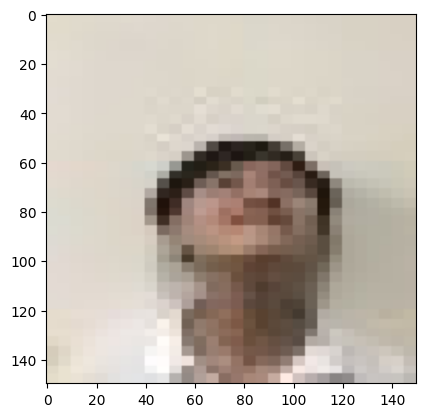

1/1 [==============================] - 0s 128ms/step
DangKhoa


In [ ]:
filename = "/content/drive/MyDrive/ROFI/ROFI_train/DangKhoa/Bản sao của DangKhoa(14).jpg"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Binh")
if(kq == 1):
    print("DangKhoa")
if(kq == 2):
    print("Ha")
if(kq == 3):
    print("HaKiet")
if(kq == 4):
    print("Hau")
if(kq == 5):
    print("Hieu")
if(kq == 6):
    print("Hoang")

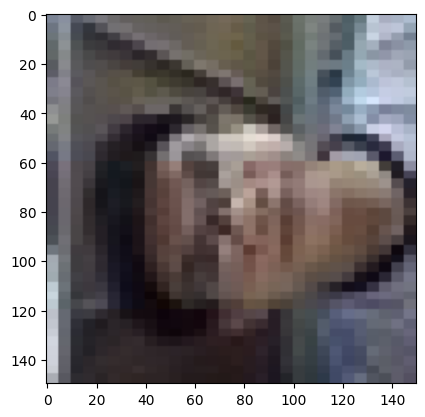

1/1 [==============================] - 0s 38ms/step
Binh


In [ ]:
filename = "/content/drive/MyDrive/ROFI/ROFI_train/Binh/Bản sao của Bản sao của Binh  5.jpg"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("Binh")
if(kq == 1):
    print("DangKhoa")
if(kq == 2):
    print("Ha")
if(kq == 3):
    print("HaKiet")
if(kq == 4):
    print("Hau")
if(kq == 5):
    print("Hieu")
if(kq == 6):
    print("Hoang")